# Classification Shap

In [3]:
from BorutaShap import BorutaShap, load_data
import pandas as pd
from sklearn.ensemble import IsolationForest


In [4]:
df=pd.read_csv(r'train(1).csv',index_col='PassengerId')


In [5]:
df=df.drop(columns=['Name','Cabin'],axis=1)
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()


In [6]:
X=df.drop('Transported',axis=1)
y=df['Transported']

In [7]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=2,weights="uniform")#=> تعداد همسایگی،و توزیع یونیفرم
imputed=knn.fit_transform(X)

X=pd.DataFrame(imputed,columns= X.columns,index=df.index)


In [16]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
model = IsolationForest(n_estimators=10000)

Feature_Selector = BorutaShap(model=model,importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=2, random_state=0)

100%|██████████| 2/2 [35:11<00:00, 1055.70s/it]

0 attributes confirmed important: []
0 attributes confirmed unimportant: []
10 tentative attributes remains: ['VIP', 'VRDeck', 'Spa', 'HomePlanet', 'CryoSleep', 'Age', 'ShoppingMall', 'RoomService', 'FoodCourt', 'Destination']


In [10]:
Feature_Selector

array(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype=object)

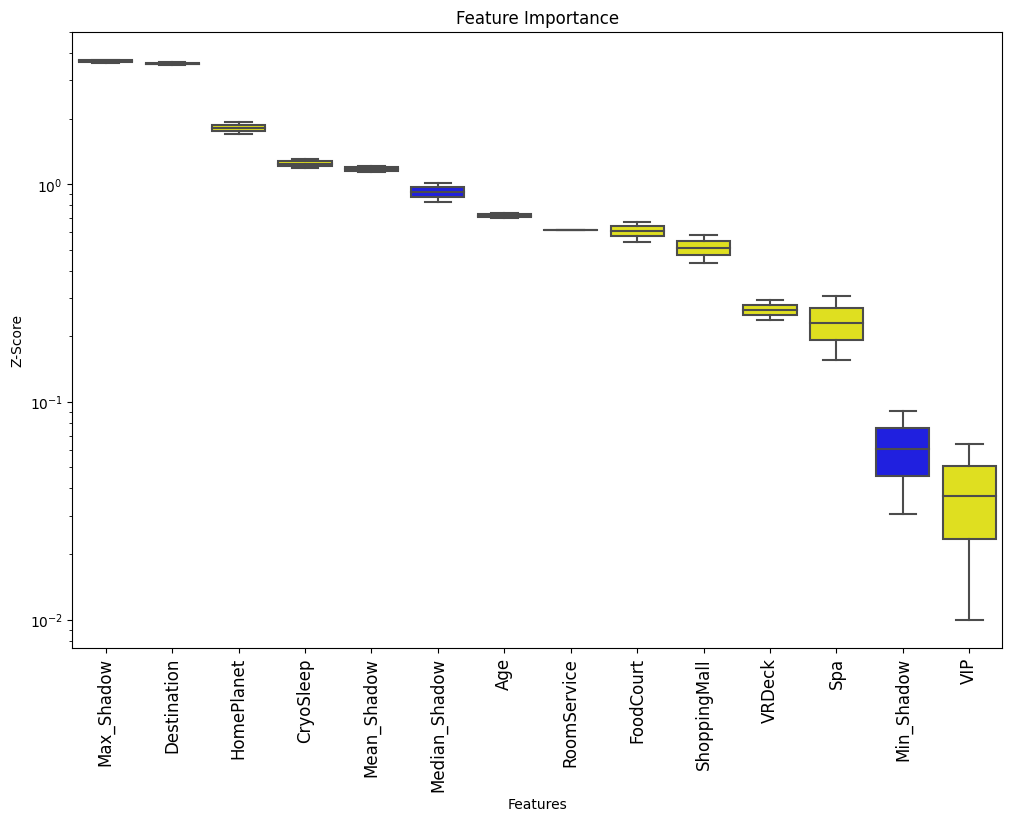

In [17]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [18]:
# as 3 attributes are still undecided we have two choices either increase the n_trials or use the TentativeRoughFix()
# method which compares the median values of the max shadow feature and the undecided features.
Feature_Selector.TentativeRoughFix()

0 tentative features are now accepted: []
10 tentative features are now rejected: ['VIP' 'VRDeck' 'Spa' 'HomePlanet' 'CryoSleep' 'Age' 'ShoppingMall'
 'RoomService' 'FoodCourt' 'Destination']


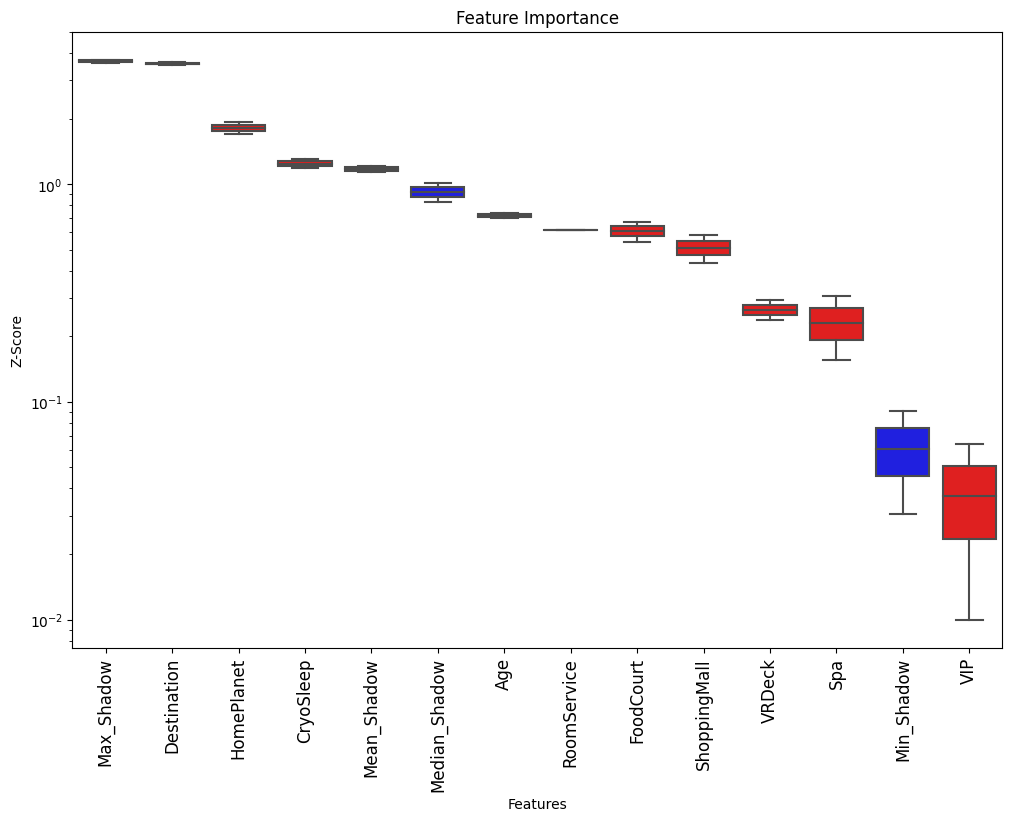

In [19]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [20]:
# Returns a subset of the original data with the selected features
subset = Feature_Selector.Subset()
subset.head()

""
PassengerId
0001_01
0002_01
0003_01
0003_02
0004_01


# Classification Shap Sampling

In [14]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0, sample=True)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.35it/s]

19 attributes confirmed important: ['mean perimeter', 'mean concavity', 'radius error', 'worst smoothness', 'mean texture', 'worst texture', 'worst perimeter', 'worst radius', 'worst concavity', 'worst compactness', 'mean compactness', 'worst area', 'worst concave points', 'mean area', 'mean concave points', 'worst symmetry', 'perimeter error', 'area error', 'mean radius']
7 attributes confirmed unimportant: ['fractal dimension error', 'mean symmetry', 'mean fractal dimension', 'smoothness error', 'symmetry error', 'texture error', 'compactness error']
4 tentative attributes remains: ['concave points error', 'worst fractal dimension', 'mean smoothness', 'concavity error']


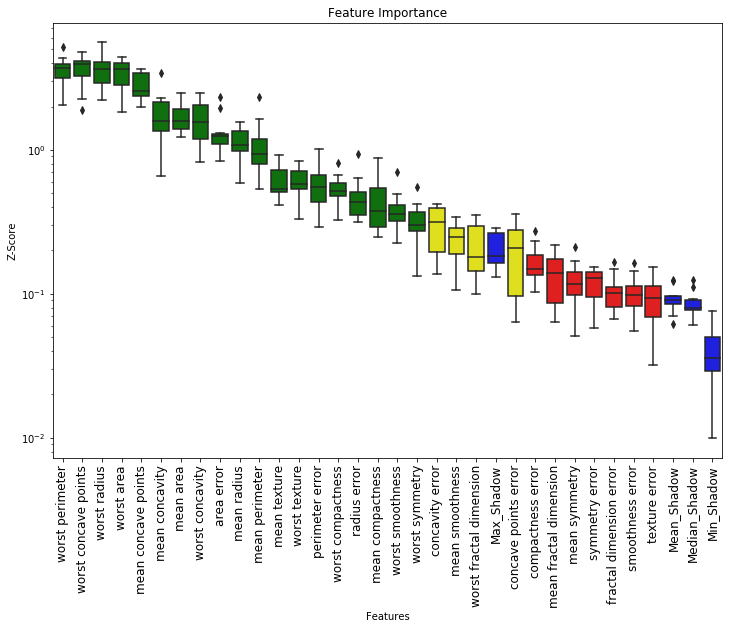

In [15]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [16]:
# as 4 attributes are still undecided we have two choices either increase the n_trials or use the TentativeRoughFix()
# method which compares the median values of the max shadow feature and the undecided features.
Feature_Selector.TentativeRoughFix()

4 tentative features are now accepted: ['concave points error' 'worst fractal dimension' 'mean smoothness'
 'concavity error']
0 tentative features are now rejected: []


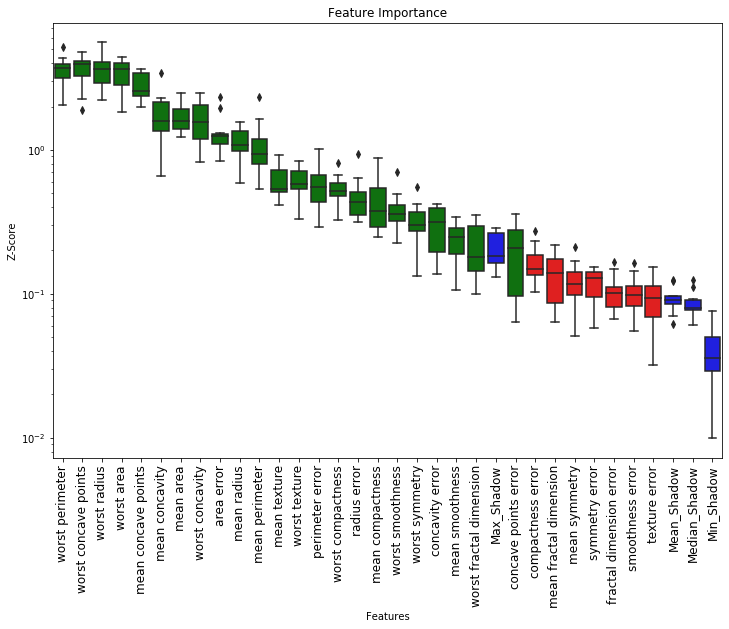

In [17]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

# Classification Gini

In [18]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='gini',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.12it/s]

23 attributes confirmed important: ['mean perimeter', 'mean concavity', 'radius error', 'worst smoothness', 'mean texture', 'worst texture', 'worst perimeter', 'worst radius', 'concavity error', 'worst concavity', 'worst compactness', 'mean compactness', 'worst fractal dimension', 'mean smoothness', 'worst area', 'worst concave points', 'mean area', 'mean concave points', 'concave points error', 'worst symmetry', 'perimeter error', 'area error', 'mean radius']
5 attributes confirmed unimportant: ['mean symmetry', 'mean fractal dimension', 'smoothness error', 'symmetry error', 'texture error']
2 tentative attributes remains: ['fractal dimension error', 'compactness error']


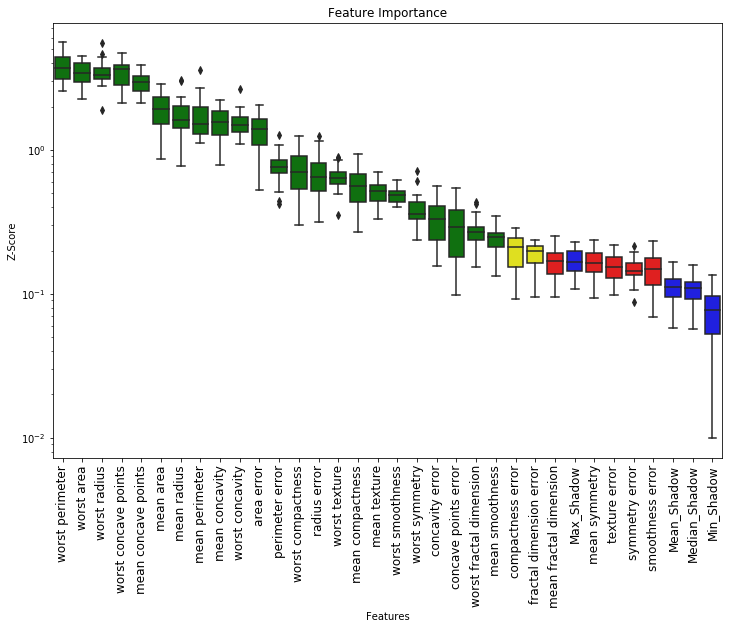

In [19]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [20]:
# as 2 attributes are still undecided we have two choices either increase the n_trials or use the TentativeRoughFix()
# method which compares the median values of the max shadow feature and the undecided features.
Feature_Selector.TentativeRoughFix()

2 tentative features are now accepted: ['fractal dimension error' 'compactness error']
0 tentative features are now rejected: []


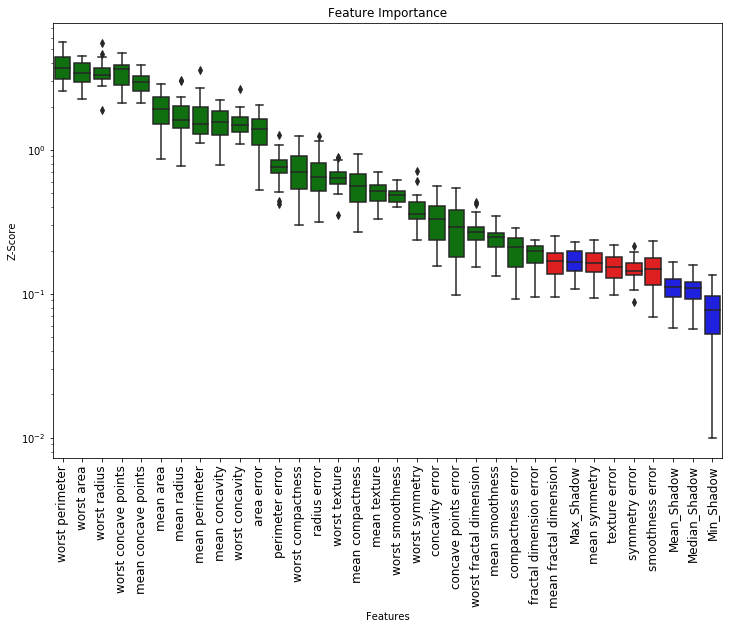

In [21]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')